In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.ndimage import sobel, gaussian_filter
from matplotlib.colors import ListedColormap


%matplotlib widget

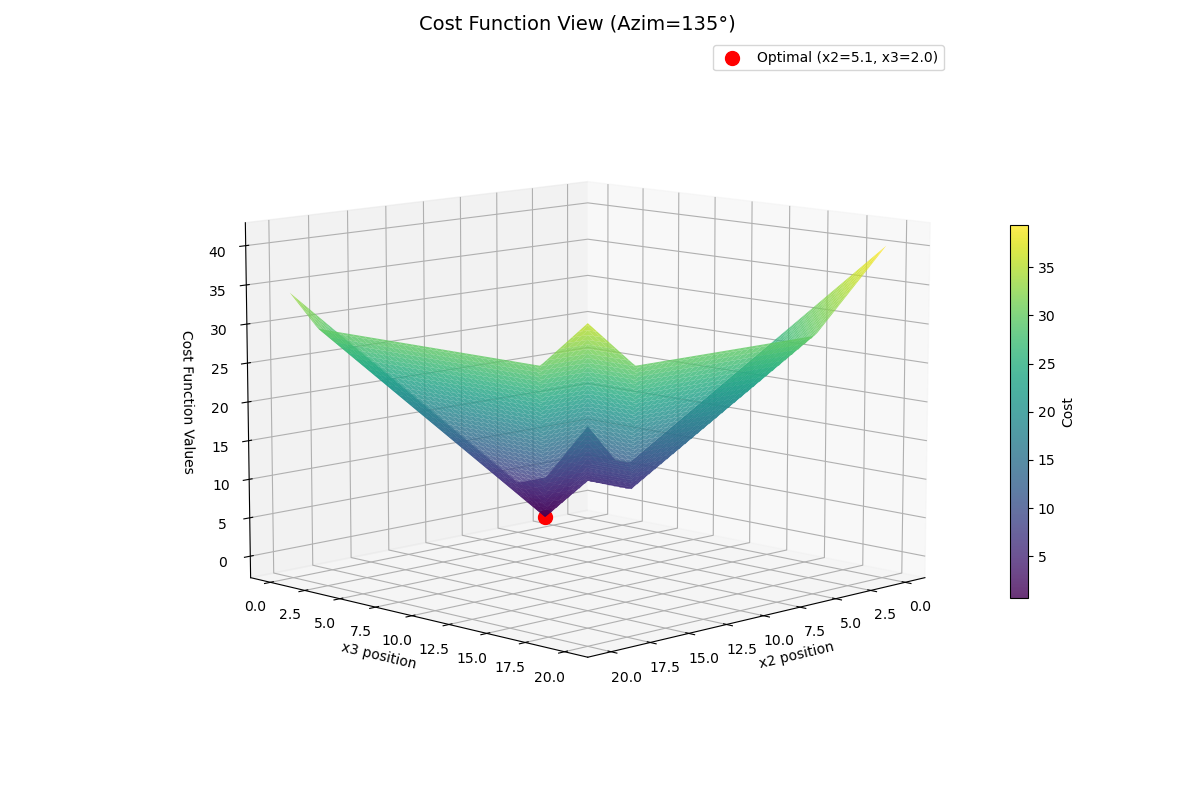

Optimal positions: x2 = 5.05, x3 = 2.02
Minimum cost: 0.10


In [2]:
D = np.array([
    [0, 5, 2],  
    [5, 0, 3],  
    [2, 3, 0]   
])

x1 = 0


x_guess = np.linspace(0, 20, 100)  
y_guess = np.linspace(0, 20, 100) 
X, Y = np.meshgrid(x_guess, y_guess)


cost = np.zeros_like(X)


for i in range(len(x_guess)):
    for j in range(len(y_guess)):
        x2 = X[i, j]  
        x3 = Y[i, j] 
        
        d12 = np.abs(x1 - x2) 
        d13 = np.abs(x1 - x3)  
        d23 = np.abs(x2 - x3)  
        
        cost[i, j] = np.abs(d12 - D[0, 1])  + np.abs(d13 - D[0, 2])  + np.abs(d23 - D[1, 2]) 

min_cost = np.min(cost)
min_idx = np.where(cost == min_cost)
optimal_x2 = X[min_idx][0]
optimal_x3 = Y[min_idx][0]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, cost, cmap='viridis', alpha=0.8)

ax.scatter(optimal_x2, optimal_x3, min_cost, 
           color='red', s=100, label=f'Optimal (x2={optimal_x2:.1f}, x3={optimal_x3:.1f})')

ax.set_xlabel('x2 position')
ax.set_ylabel('x3 position')
ax.set_zlabel('Cost Function Values')
ax.set_title(r'Cost Function: $\sum(|x_j - x_k| - D_{jk})^2$', fontsize=14)
plt.colorbar(surf, ax=ax, shrink=0.5, label='Cost')
plt.legend()
# Loop over azimuth angles and save views
for angle in range(0, 180, 45):  # every 10 degrees
    ax.view_init(elev=10, azim=angle)

    # Update the plot title with current angle (optional)
    ax.set_title(rf'Cost Function View (Azim={angle}°)', fontsize=14)

    # Save the current view
    plt.savefig(f'plots/surface_view_{angle:03d}.png', dpi=300, bbox_inches='tight')
ax.view_init(elev=10, azim=45)

plt.tight_layout()
plt.show()

print(f"Optimal positions: x2 = {optimal_x2:.2f}, x3 = {optimal_x3:.2f}")
print(f"Minimum cost: {min_cost:.2f}")

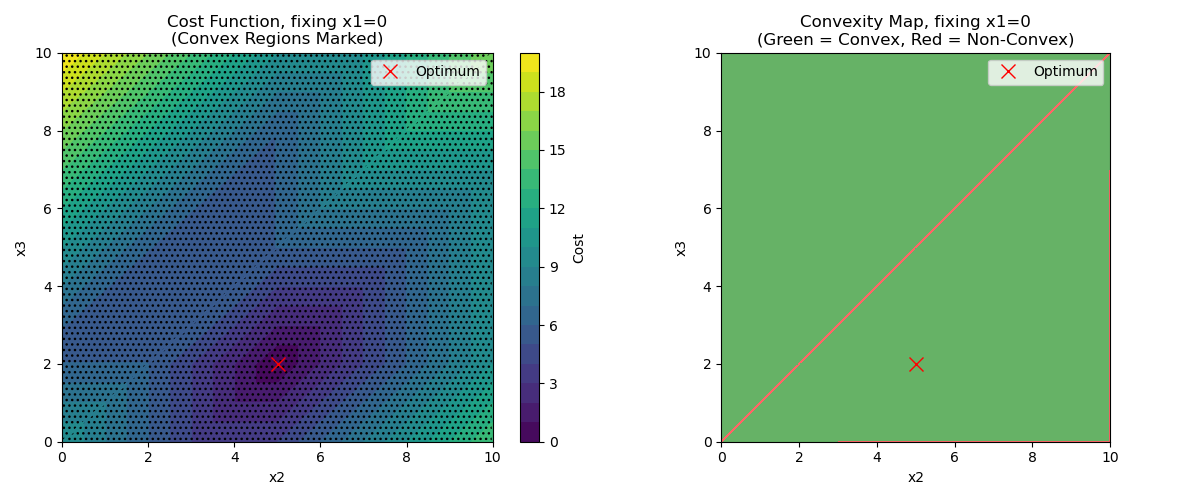

In [3]:
D = np.array([[0, 5, 2], [5, 0, 3], [2, 3, 0]])
x1 = 0
x_guess = np.linspace(0, 10, 1000)
y_guess = np.linspace(0, 10, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d12 = np.abs(x1 - X)
d13 = np.abs(x1 - Y)
d23 = np.abs(X - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x2_opt = X[min_idx]
x3_opt = Y[min_idx]
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x2_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Cost Function, fixing x1=0\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x2_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map, fixing x1=0\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_x1_0.png', dpi=300, bbox_inches='tight')
plt.show()

<class 'tuple'>


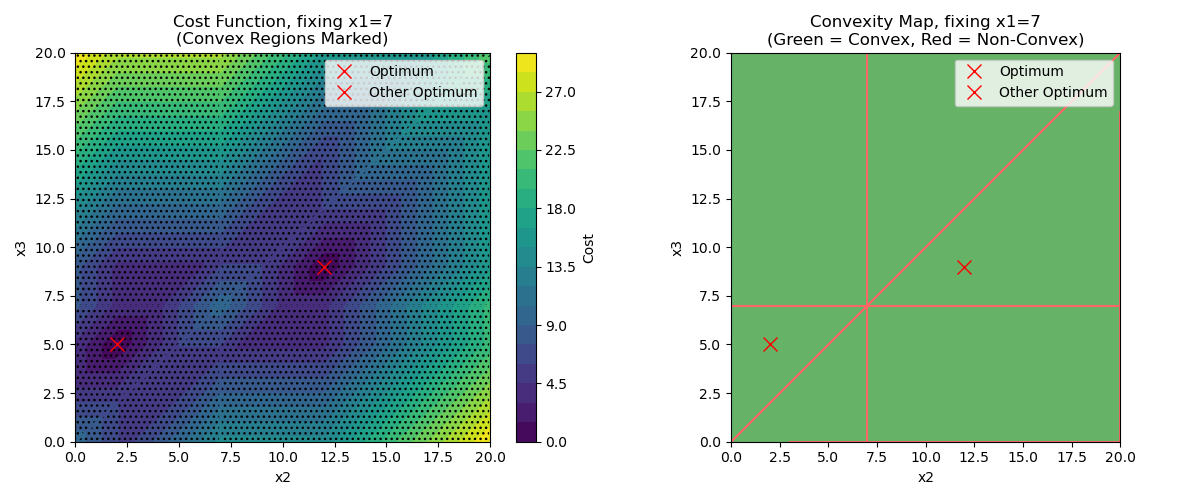

In [4]:
D = np.array([[0, 5, 2], [5, 0, 3], [2, 3, 0]])
x1 = 7
x_guess = np.linspace(0, 20, 1000)
y_guess = np.linspace(0, 20, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d12 = np.abs(x1 - X)
d13 = np.abs(x1 - Y)
d23 = np.abs(X - Y)
cost = np.abs(d12 - D[0,1]) + np.abs(d13 - D[0,2]) + np.abs(d23 - D[1,2])

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
print(type(min_idx))
x2_opt = X[min_idx]
x3_opt = Y[min_idx]

# Flatten the cost array
flat_cost = cost_smooth.flatten()

# Get indices of sorted cost values
sorted_indices = np.argsort(flat_cost)

# Get the index of the second smallest value
second_min_flat_index = sorted_indices[1]

# Convert flat index back to 2D coordinates
second_min_idx = np.unravel_index(second_min_flat_index, cost_smooth.shape)

# Extract values at that position
x2_opt_2 = X[second_min_idx]
x3_opt_2 = Y[second_min_idx]


plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x2_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.plot(x2_opt_2, x3_opt_2, 'rx', markersize=10, label='Other Optimum')

plt.title("Cost Function, fixing x1=7\n(Convex Regions Marked)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x2_opt, x3_opt, 'rx', markersize=10, label='Optimum')
plt.plot(x2_opt_2, x3_opt_2, 'rx', markersize=10, label='Other Optimum')

plt.title("Convexity Map, fixing x1=7\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x2")
plt.ylabel("x3")
plt.legend()

plt.tight_layout()
plt.savefig('plots/var_x1_7.png', dpi=300, bbox_inches='tight')
plt.show()

<class 'tuple'>


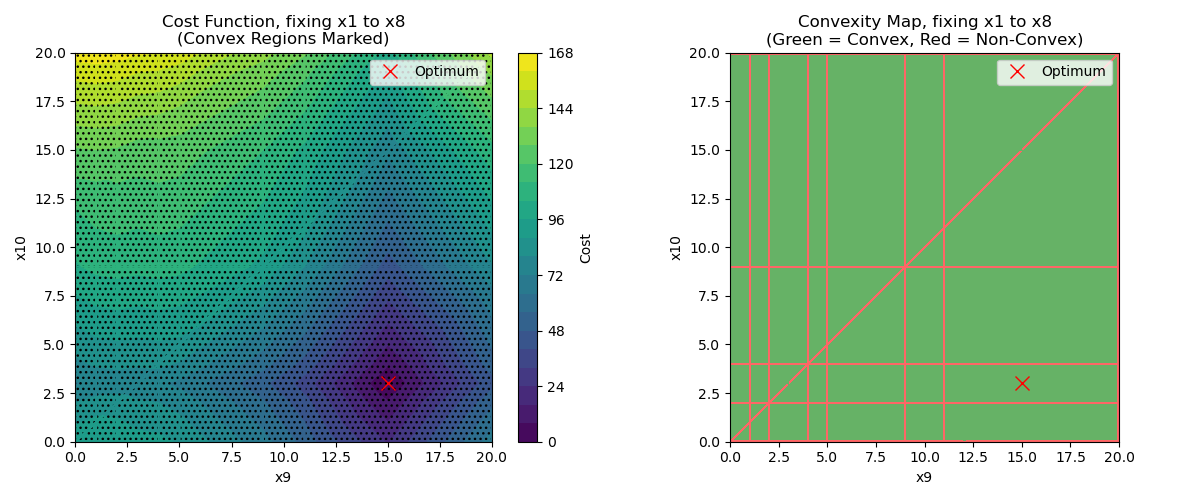

In [5]:
D = np.array([
    [0, 5, 2, 9, 4, 1, 7, 11, 15, 3],
    [5, 0, 3, 4, 1, 4, 2, 6, 10, 2],
    [2, 3, 0, 7, 2, 1, 5, 9, 13, 1],
    [9, 4, 7, 0, 5, 8, 2, 2, 6, 6],
    [4, 1, 2, 5, 0, 3, 3, 7, 11, 1],
    [1, 4, 1, 8, 3, 0, 6, 10, 14, 2],
    [7, 2, 5, 2, 3, 6, 0, 4, 8, 4],
    [11, 6, 9, 2, 7, 10, 4, 0, 4, 8],
    [15, 10, 13, 6, 11, 14, 8, 4, 0, 12],
    [3, 2, 1, 6, 1, 2, 4, 8, 12, 0]
])

x1 = 0
x2 = 5
x3 = 2
x4 = 9
x5 = 4
x6 = 1
x7 = 7
x8 = 11
x_guess = np.linspace(0, 20, 1000)
y_guess = np.linspace(0, 20, 1000)
X, Y = np.meshgrid(x_guess, y_guess)

d19 = np.abs(x1 - X)
d29 = np.abs(x2 - X)
d39 = np.abs(x3 - X)
d49 = np.abs(x4 - X)
d59 = np.abs(x5 - X)
d69 = np.abs(x6 - X)
d79 = np.abs(x7 - X)
d89 = np.abs(x8 - X)

d10 = np.abs(x1 - Y)
d20 = np.abs(x2 - Y)
d30 = np.abs(x3 - Y)
d40 = np.abs(x4 - Y)
d50 = np.abs(x5 - Y)
d60 = np.abs(x6 - Y)
d70 = np.abs(x7 - Y)
d80 = np.abs(x8 - Y)
d90 = np.abs(X - Y)


cost = (np.abs(d19 - D[0,8]) + 
        np.abs(d29 - D[1,8]) +
        np.abs(d39 - D[2,8]) +
        np.abs(d49 - D[3,8]) +
        np.abs(d59 - D[4,8]) +
        np.abs(d69 - D[5,8]) +
        np.abs(d79 - D[6,8]) +
        np.abs(d89 - D[7,8]) +
        np.abs(d10 - D[0,9]) +
        np.abs(d20 - D[1,9]) +
        np.abs(d30 - D[2,9]) +
        np.abs(d40 - D[3,9]) +
        np.abs(d50 - D[4,9]) +
        np.abs(d60 - D[5,9]) +
        np.abs(d70 - D[6,9]) +
        np.abs(d80 - D[7,9]) +
        np.abs(d90 - D[8,9]))

cost_smooth = gaussian_filter(cost, sigma=1)

dx = sobel(cost_smooth, axis=0)
dy = sobel(cost_smooth, axis=1)
dxx = sobel(dx, axis=0)
dxy = sobel(dx, axis=1)
dyy = sobel(dy, axis=1)

eig1 = 0.5*(dxx + dyy + np.sqrt((dxx-dyy)**2 + 4*dxy**2))
eig2 = 0.5*(dxx + dyy - np.sqrt((dxx-dyy)**2 + 4*dxy**2))
convex_region = (eig1 >= -0.1) & (eig2 >= -0.1)  

min_idx = np.unravel_index(np.argmin(cost_smooth), cost_smooth.shape)
x9_opt = X[min_idx]
x10_opt = Y[min_idx]

plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.contourf(X, Y, cost_smooth, levels=20, cmap='viridis')
plt.colorbar(label='Cost')
plt.contourf(X, Y, convex_region, levels=[0.5, 1.5], colors='none', 
              hatches=['...'], alpha=0)
plt.plot(x9_opt, x10_opt, 'rx', markersize=10, label='Optimum')

plt.title("Cost Function, fixing x1 to x8\n(Convex Regions Marked)")
plt.xlabel("x9")
plt.ylabel("x10")
plt.legend()

plt.subplot(122)
plt.imshow(convex_region, 
           extent=[x_guess.min(), x_guess.max(), y_guess.min(), y_guess.max()],
           origin='lower', 
           cmap=ListedColormap(['red', 'green']),
           alpha=0.6,
           interpolation='nearest')

plt.plot(x9_opt, x10_opt, 'rx', markersize=10, label='Optimum')
plt.title("Convexity Map, fixing x1 to x8\n(Green = Convex, Red = Non-Convex)")
plt.xlabel("x9")
plt.ylabel("x10")
plt.legend()
plt.tight_layout()
plt.savefig('plots/var_many.png', dpi=300, bbox_inches='tight')
plt.show()